Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 569.1704 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9429 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0758 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9206 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2570 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7733 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9348 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9632  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6015 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3348  
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1847 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3174  
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0092  
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5736 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

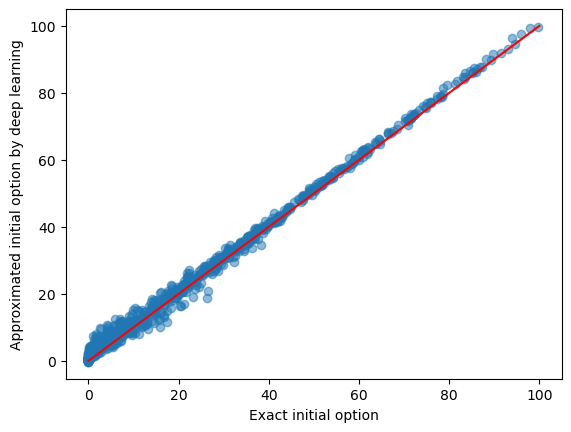

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.models import Sequential
from keras.layers import Dense

# Define the Black-Scholes option pricing formula for a call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Generate some training data
np.random.seed(0)
num_samples = 10000
S = np.random.uniform(low=10, high=100, size=num_samples)
K = np.random.uniform(low=10, high=10, size=num_samples)
T = np.random.uniform(low=0.1, high=1, size=num_samples)
r = np.random.uniform(low=0.01, high=0.05, size=num_samples)
sigma = np.random.uniform(low=0.1, high=0.5, size=num_samples)
exact_prices = black_scholes_call(S, K, T, r, sigma)

# Generate some test data
np.random.seed(0)
num_test_samples = 1000
test_S = np.random.uniform(low=50, high=150, size=num_test_samples)
test_K = np.random.uniform(low=50, high=150, size=num_test_samples)
test_T = np.random.uniform(low=0.1, high=1, size=num_test_samples)
test_r = np.random.uniform(low=0.01, high=0.05, size=num_test_samples)
test_sigma = np.random.uniform(low=0.1, high=0.5,
size=num_test_samples)
exact_prices = black_scholes_call(test_S, test_K, test_T, test_r,
test_sigma)

model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

# Create an instance of the SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD optimizer
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(np.column_stack([test_S, test_K, test_T, test_r, test_sigma]),
exact_prices, epochs=100, batch_size=32)

# Calculate the neural network's predictions for the test data
nn_prices = model.predict(np.column_stack((test_S, test_K, test_T,
test_r, test_sigma))).flatten()

# Calculate the exact prices for the same test data
exact_prices = black_scholes_call(test_S, test_K,
test_T, test_r, test_sigma)

# Compare the results
mse = np.mean((exact_prices - nn_prices)**2)
print('MSE between exact and neural network prices:', mse)

# Plot the results
plt.scatter(exact_prices, nn_prices, alpha=0.5)
plt.plot(np.linspace(0, 100, 100), np.linspace(0, 100, 100), color='red')
plt.xlabel('Exact initial option')
plt.ylabel('Approximated initial option by deep learning')
plt.show()


